In [13]:
!pip install pywavelets neurokit2 numpy scipy matplotlib pandas seaborn tqdm

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Eduardo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [19]:
%pip install neurokit2 pywavelets

  Using cached neurokit2-0.2.12-py2.py3-none-any.whl.metadata (37 kB)
  Using cached pywavelets-1.9.0-cp312-cp312-win_amd64.whl.metadata (7.6 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.9 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.9 kB ? eta -:--:--
     ------------- ------------------------- 20.5/60.9 kB 81.9 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.9 kB 130.4 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.9 kB 163.4 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.9 kB 163.4 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.9 kB 163.4 kB/s eta 0:00:01
     -------------------------------------- 60.9/60.9 kB 154.6 kB/s eta 0:00:00
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     -------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
%pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   -- ------------------------------------ 20.5/294.9 kB 330.3 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/294.9 kB 975.2 kB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
%pip install tqdm

     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     --------------------- ------------------ 30.7/57.7 kB ? eta -:--:--
     --------------------------------- ---- 51.2/57.7 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 57.7/57.7 kB 504.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   ---------------------------------------- 78.5/78.5 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
# === Importación de librerías necesarias ===
import neurokit2 as nk
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import pickle

In [ ]:
import pickle

# Ruta del dataset
pkl_path = r"C:\Users\Eduardo\OneDrive\Escritorio\Señales_Lab12\LAB-EKG-PROCESSING\LAB-EKG-PROCESSING\ECG_DATASET\dataset_ekg.pkl"

# Cargar el dataset
with open(pkl_path, "rb") as f:
    dataset = pickle.load(f)

# Ver las clases disponibles
dataset.keys()


dict_keys(['NSR', 'VT', 'IVR', 'VFL', 'Fusion', 'LBBBB', 'RBBBB', 'SDHB', 'PR', 'APB', 'AFL', 'AFIB', 'SVTA', 'WPW', 'PVC', 'Bigeminy', 'Trigeminy'])

In [ ]:
# Seleccionar la señal de la clase SVTA, fila 0
ecg_signal = dataset["SVTA"][0, :]
print("Forma de la señal SVTA fila 0:", ecg_signal.shape)
# Frecuencia de muestreo 
fs = 360  
# Vector de tiempo
t = np.arange(ecg_signal.shape[0]) / fs


Forma de la señal SVTA fila 0: (3600,)


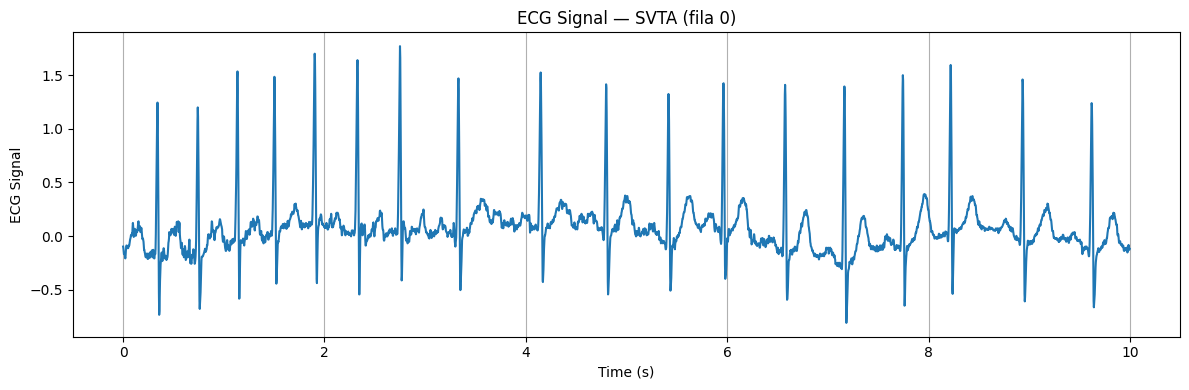

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(t, ecg_signal)
plt.xlabel("Time (s)")
plt.ylabel("ECG Signal")
plt.title("ECG Signal — SVTA (fila 0)")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [32]:
# 1. Procesamiento de la señal ECG real (SVTA, fila 0) con neurokit2

signals_nk, info_nk = nk.ecg_process(ecg_signal, sampling_rate=fs)

# Revisamos qué información devuelve neurokit2
info_nk.keys()


dict_keys(['method_peaks', 'method_fixpeaks', 'ECG_R_Peaks', 'ECG_R_Peaks_Uncorrected', 'ECG_fixpeaks_ectopic', 'ECG_fixpeaks_missed', 'ECG_fixpeaks_extra', 'ECG_fixpeaks_longshort', 'ECG_fixpeaks_method', 'ECG_fixpeaks_rr', 'ECG_fixpeaks_drrs', 'ECG_fixpeaks_mrrs', 'ECG_fixpeaks_s12', 'ECG_fixpeaks_s22', 'ECG_fixpeaks_c1', 'ECG_fixpeaks_c2', 'sampling_rate', 'ECG_P_Peaks', 'ECG_P_Onsets', 'ECG_P_Offsets', 'ECG_Q_Peaks', 'ECG_R_Onsets', 'ECG_R_Offsets', 'ECG_S_Peaks', 'ECG_T_Peaks', 'ECG_T_Onsets', 'ECG_T_Offsets'])

Cantidad de picos R detectados (QRS): 18


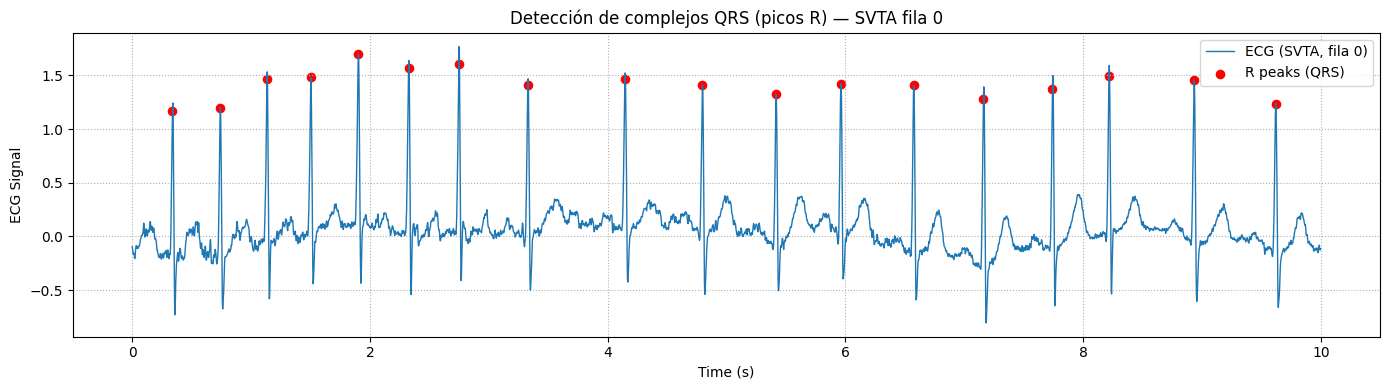

In [35]:
# 2. Detección de QRS: picos R

r_peaks_nk = info_nk["ECG_R_Peaks"]   # índices de los picos R

print("Cantidad de picos R detectados (QRS):", len(r_peaks_nk))

# Gráfico solo con QRS (R-peaks)
plt.figure(figsize=(14, 4))
plt.plot(t, ecg_signal, label="ECG (SVTA, fila 0)", linewidth=1)
plt.scatter(t[r_peaks_nk], ecg_signal[r_peaks_nk],
            color="red", marker="o", s=35, label="R peaks (QRS)")
plt.xlabel("Time (s)")
plt.ylabel("ECG Signal")
plt.title("Detección de complejos QRS (picos R) — SVTA fila 0")
plt.legend()
plt.grid(ls=":")
plt.tight_layout()
plt.show()



Cantidad de ondas P detectadas: 18


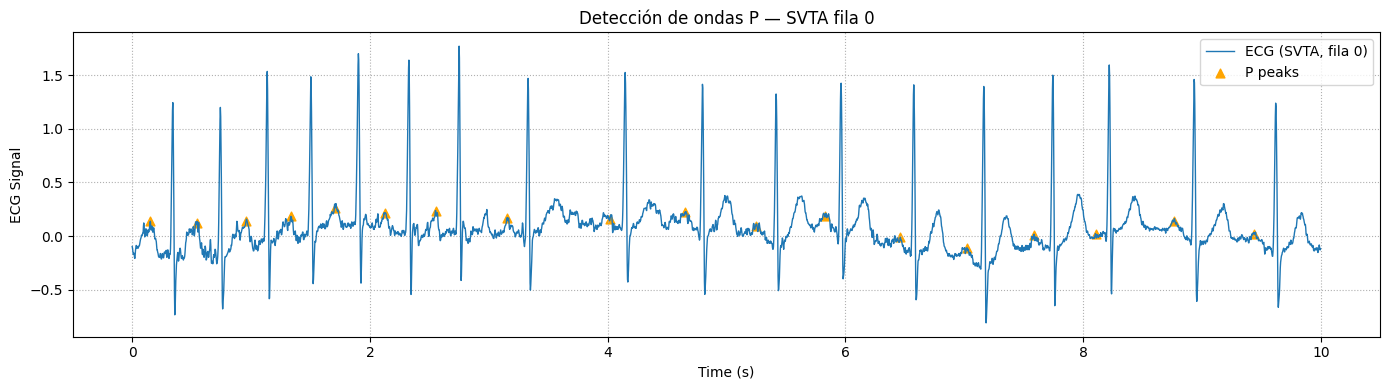

In [36]:
# 3. Detección de ondas P

p_peaks_nk = info_nk["ECG_P_Peaks"]   # índices de ondas P

print("Cantidad de ondas P detectadas:", len(p_peaks_nk))

# Gráfico solo con ondas P
plt.figure(figsize=(14, 4))
plt.plot(t, ecg_signal, label="ECG (SVTA, fila 0)", linewidth=1)
plt.scatter(t[p_peaks_nk], ecg_signal[p_peaks_nk],
            color="orange", marker="^", s=40, label="P peaks")
plt.xlabel("Time (s)")
plt.ylabel("ECG Signal")
plt.title("Detección de ondas P — SVTA fila 0")
plt.legend()
plt.grid(ls=":")
plt.tight_layout()
plt.show()



In [38]:
print("Contenido bruto de t_peaks_nk:")
print(t_peaks_nk)
print(type(t_peaks_nk))

Contenido bruto de t_peaks_nk:
[194, 318, 464, 615, 742, 918, 1070, nan, 1566, 1799, 2023, 2217, 2441, 2646, 2866, 3036, nan, 3541]
<class 'list'>


Contenido limpio de t_peaks_nk: [ 194  318  464  615  742  918 1070 1566 1799 2023 2217 2441 2646 2866
 3036 3541]
Cantidad de ondas T detectadas: 16


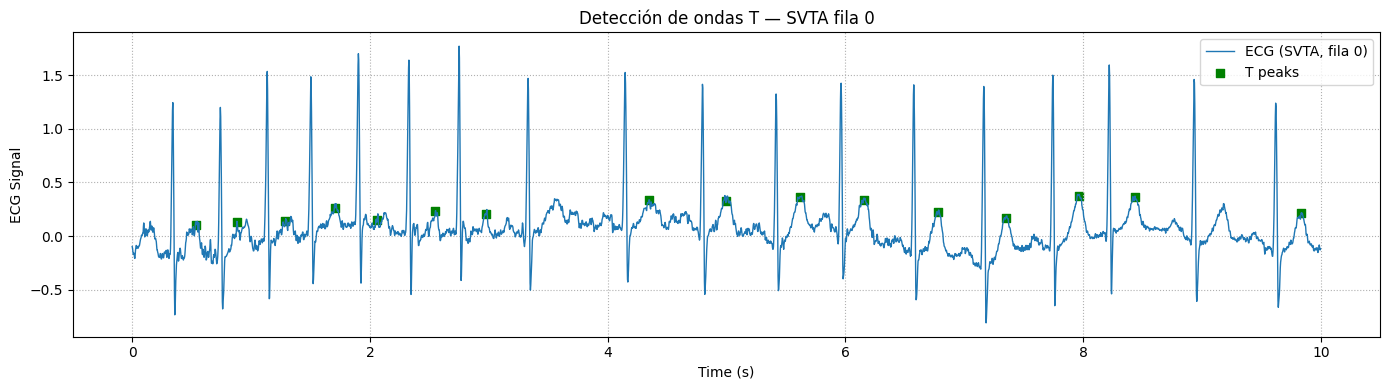

In [39]:
# 4. Detección de ondas T (limpiando nans)

import numpy as np

t_peaks_nk_raw = info_nk["ECG_T_Peaks"]   # lista con ints y nan

# Limpiar: quedarnos solo con valores finitos (no nan) y convertir a int
t_peaks_nk = np.array([int(x) for x in t_peaks_nk_raw if np.isfinite(x)], dtype=int)

print("Contenido limpio de t_peaks_nk:", t_peaks_nk)
print("Cantidad de ondas T detectadas:", len(t_peaks_nk))

# Gráfico solo con ondas T
plt.figure(figsize=(14, 4))
plt.plot(t, ecg_signal, label="ECG (SVTA, fila 0)", linewidth=1)
plt.scatter(t[t_peaks_nk], ecg_signal[t_peaks_nk],
            color="green", marker="s", s=35, label="T peaks")
plt.xlabel("Time (s)")
plt.ylabel("ECG Signal")
plt.title("Detección de ondas T — SVTA fila 0")
plt.legend()
plt.grid(ls=":")
plt.tight_layout()
plt.show()



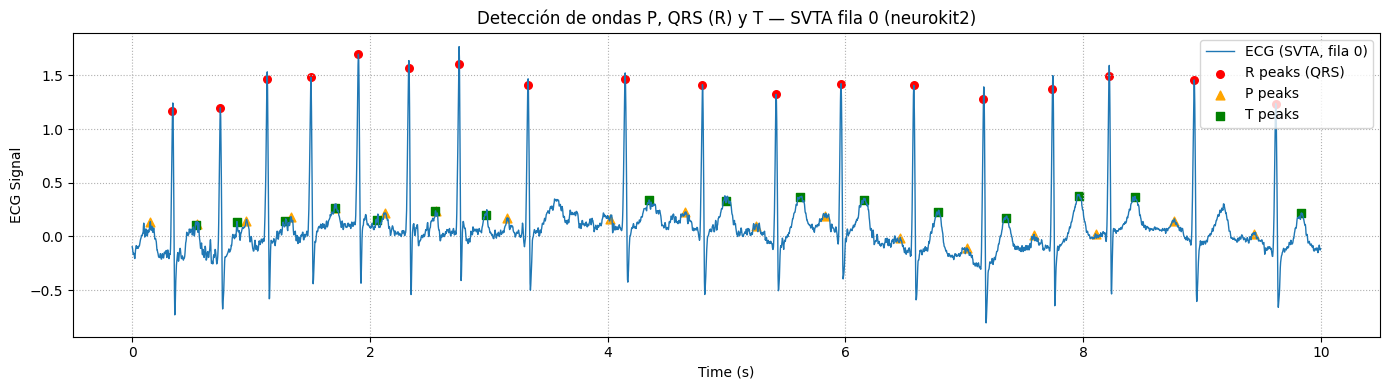

In [40]:
# 5. Visualización conjunta de ondas P, QRS (R) y T

plt.figure(figsize=(14, 4))
plt.plot(t, ecg_signal, label="ECG (SVTA, fila 0)", linewidth=1)

# QRS
plt.scatter(t[r_peaks_nk], ecg_signal[r_peaks_nk],
            color="red", marker="o", s=30, label="R peaks (QRS)")

# P
plt.scatter(t[p_peaks_nk], ecg_signal[p_peaks_nk],
            color="orange", marker="^", s=40, label="P peaks")

# T (ya limpio)
plt.scatter(t[t_peaks_nk], ecg_signal[t_peaks_nk],
            color="green", marker="s", s=30, label="T peaks")

plt.xlabel("Time (s)")
plt.ylabel("ECG Signal")
plt.title("Detección de ondas P, QRS (R) y T — SVTA fila 0 (neurokit2)")
plt.legend()
plt.grid(ls=":")
plt.tight_layout()
plt.show()


In [47]:
# Zoom en un latido: selección de ventana y filtrado de picos
# Elige una ventana de tiempo donde se vea bien un latido completo 
t_min, t_max = 2.5, 3.5  # en segundos

# Máscara para las muestras dentro de esa ventana
mask = (t >= t_min) & (t <= t_max)

# Filtrar picos R, P y T que caen dentro de esa ventana
r_peaks_zoom = [idx for idx in r_peaks_nk if t_min <= t[idx] <= t_max]
p_peaks_zoom = [idx for idx in p_peaks_nk if t_min <= t[idx] <= t_max]
t_peaks_zoom = [idx for idx in t_peaks_nk if t_min <= t[idx] <= t_max]

print("R en zoom:", r_peaks_zoom)
print("P en zoom:", p_peaks_zoom)
print("T en zoom:", t_peaks_zoom)


R en zoom: [np.int64(989), np.int64(1198)]
P en zoom: [919, 1136]
T en zoom: [np.int64(918), np.int64(1070)]


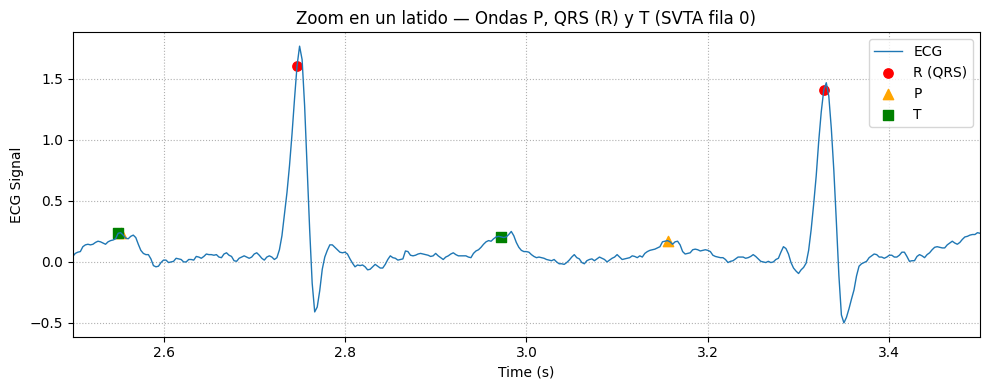

In [48]:
# Gráfico con zoom en un latido, mostrando P, QRS (R) y T

plt.figure(figsize=(10, 4))
plt.plot(t[mask], ecg_signal[mask], linewidth=1, label="ECG")

# Marcar solo los picos dentro de la ventana
plt.scatter(t[r_peaks_zoom], ecg_signal[r_peaks_zoom],
            color="red", s=45, label="R (QRS)")
plt.scatter(t[p_peaks_zoom], ecg_signal[p_peaks_zoom],
            color="orange", s=55, marker="^", label="P")
plt.scatter(t[t_peaks_zoom], ecg_signal[t_peaks_zoom],
            color="green", s=45, marker="s", label="T")

plt.xlim(t_min, t_max)
plt.xlabel("Time (s)")
plt.ylabel("ECG Signal")
plt.title("Zoom en un latido — Ondas P, QRS (R) y T (SVTA fila 0)")
plt.grid(ls=":")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Función para calcular intervalos RR y HR

def rr_intervals_ms(r_peaks, fs):
    """Devuelve intervalos RR en ms y frecuencia cardíaca (HR) en bpm."""
    if len(r_peaks) < 2:
        return np.array([]), np.array([])
    rr_ms = np.diff(r_peaks) * 1000.0 / fs      # diferencia en muestras → ms
    hr_bpm = 60_000.0 / rr_ms                  # HR = 60000 / RR(ms)
    return rr_ms, hr_bpm


Intervalos RR (ms): [402.77777778 391.66666667 369.44444444 400.         422.22222222
 422.22222222 580.55555556 816.66666667 652.77777778 619.44444444
 544.44444444 613.88888889 586.11111111 580.55555556 475.
 716.66666667 686.11111111]
Frecuencia cardíaca (bpm): [148.96551724 153.19148936 162.40601504 150.         142.10526316
 142.10526316 103.3492823   73.46938776  91.91489362  96.86098655
 110.20408163  97.73755656 102.36966825 103.3492823  126.31578947
  83.72093023  87.44939271]


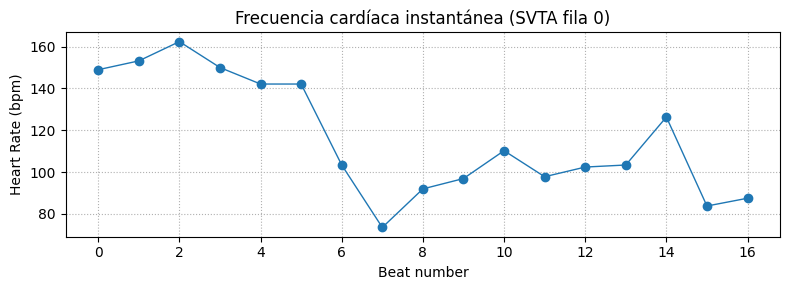

In [44]:
# Cálculo de RR y frecuencia cardíaca a partir de los picos R detectados

rr_ms, hr_bpm = rr_intervals_ms(r_peaks_nk, fs)

print("Intervalos RR (ms):", rr_ms)
print("Frecuencia cardíaca (bpm):", hr_bpm)

plt.figure(figsize=(8, 3))
plt.plot(hr_bpm, marker='o', linewidth=1)
plt.title("Frecuencia cardíaca instantánea (SVTA fila 0)")
plt.xlabel("Beat number")
plt.ylabel("Heart Rate (bpm)")
plt.grid(ls=":")
plt.tight_layout()
plt.show()
